In [17]:
import os
import pandas as pd

print(os.getcwd())

os.chdir(r'C:\Users\Ana Valls\Desktop\CURSO BIG DATA\IBM\Machine Learning with Python\Proyecto 6')

try:
    df = pd.read_csv('energy_data.csv')
    print("Datos de consumo de energía:")
    print(df.head())
except pd.errors.ParserError as e:
    print(f"Error al analizar el archivo CSV: {e}")
except Exception as e:
    print(f"Otro error al leer el archivo CSV: {e}")


c:\Users\Ana Valls\Desktop\CURSO BIG DATA\IBM\Machine Learning with Python\Proyecto 6
Datos de consumo de energía:
         Date Source_Type  Energy_Consumed  Efficiency
0  2023-01-01       Solar             1200        85.5
1  2023-01-02        Wind             1500        90.2
2  2023-01-03       Hydro             1100        88.0
3  2023-01-04       Solar             1300        84.0
4  2023-01-05        Wind             1600        92.5


In [2]:

if 'df' in locals() and not df.empty:

    df['Date'] = pd.to_datetime(df['Date'])
    
    df = pd.get_dummies(df, columns=['Source_Type'])
    
    df['Efficiency'].fillna(df['Efficiency'].mean(), inplace=True)

    print("Datos preprocesados de consumo de energía:")
    print(df.head())
else:
    print("El DataFrame no se cargó correctamente. No se puede continuar con el procesamiento.")


Datos preprocesados de consumo de energía:
        Date  Energy_Consumed  Efficiency  Source_Type_Hydro  \
0 2023-01-01             1200        85.5              False   
1 2023-01-02             1500        90.2              False   
2 2023-01-03             1100        88.0               True   
3 2023-01-04             1300        84.0              False   
4 2023-01-05             1600        92.5              False   

   Source_Type_Solar  Source_Type_Wind  
0               True             False  
1              False              True  
2              False             False  
3               True             False  
4              False              True  


C:\Users\Ana Valls\AppData\Local\Temp\ipykernel_10616\3196914814.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Efficiency'].fillna(df['Efficiency'].mean(), inplace=True)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(['Date', 'Energy_Consumed'], axis=1)
y = df['Energy_Consumed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Predicciones de consumo de energía:', y_pred)


Predicciones de consumo de energía: [1068.25396825 1604.87528345]


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


df['Efficiency_Class'] = pd.qcut(df['Efficiency'], q=3, labels=['Low', 'Medium', 'High'])

X = df.drop(['Date', 'Energy_Consumed', 'Efficiency', 'Efficiency_Class'], axis=1)
y = df['Efficiency_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
      Medium       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [20]:
try:
    df = pd.read_csv('energy_data.csv')
    print("Datos del archivo CSV:")
    print(df.head())
except pd.errors.ParserError as e:
    print(f"Error al analizar el archivo CSV: {e}")
    df = pd.DataFrame()
except Exception as e:
    print(f"Otro error al leer el archivo CSV: {e}")
    df = pd.DataFrame()
    
print("Columnas del DataFrame:", df.columns)


Datos del archivo CSV:
         Date Source_Type  Energy_Consumed  Efficiency
0  2023-01-01       Solar             1200        85.5
1  2023-01-02        Wind             1500        90.2
2  2023-01-03       Hydro             1100        88.0
3  2023-01-04       Solar             1300        84.0
4  2023-01-05        Wind             1600        92.5
Columnas del DataFrame: Index(['Date', 'Source_Type', 'Energy_Consumed', 'Efficiency'], dtype='object')


In [23]:
def recommend_energy_source(df):

    if 'Source_Type' not in df.columns or 'Efficiency' not in df.columns:
        raise KeyError('Las columnas "Source_Type" y "Efficiency" deben estar en el DataFrame.')

    efficiency_means = df.groupby('Source_Type')['Efficiency'].mean()
    
    recommended_sources = efficiency_means.sort_values(ascending=False)
    
    return recommended_sources

print("Recomendaciones de fuentes de energía:")
try:
    recommendations = recommend_energy_source(df)
    print(recommendations)
except KeyError as e:
    print(f"Error: {e}")


Recomendaciones de fuentes de energía:
Source_Type
Wind     91.233333
Hydro    87.266667
Solar    83.750000
Name: Efficiency, dtype: float64


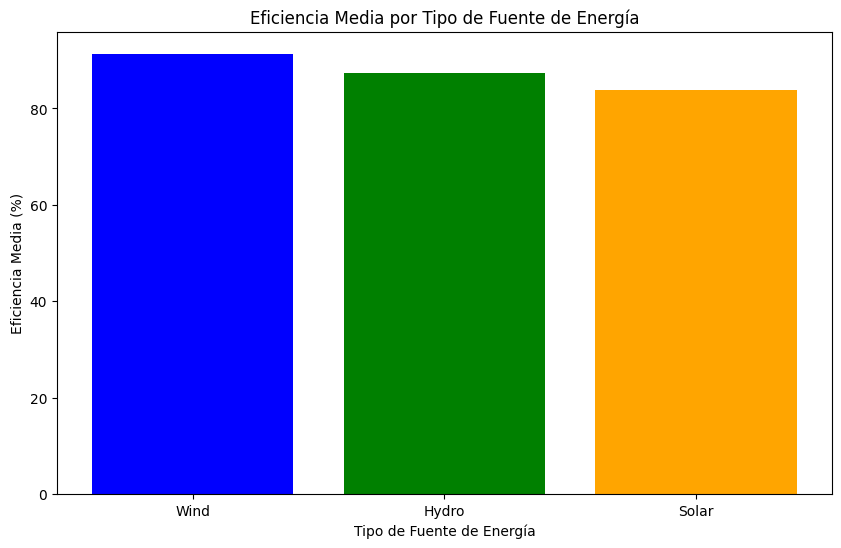

In [28]:
import matplotlib.pyplot as plt

def plot_efficiency_matplotlib(df):
    plt.figure(figsize=(10, 6))
    plt.bar(recommendations.index, recommendations.values, color=['blue', 'green', 'orange'])
    plt.xlabel('Tipo de Fuente de Energía')
    plt.ylabel('Eficiencia Media (%)')
    plt.title('Eficiencia Media por Tipo de Fuente de Energía')
    plt.show()
    
plot_efficiency_matplotlib(df)